# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Four observations or inferences that can be made from the data
#### Observation 1: There is a relatively strong relationship between a city's temperature and it's distance from the equator.
Several of the figures show that city temperatures increase the closer they are to the equator. For instance Figure 5 shows that there is a strong negative correlation between maximum temperature and latitude for cities located within the Northern hemisphere (-0.83), while Figure 6 shows a slightly weaker but still strong positive relationship between maximum temperature and latitude for cities located within the Southern hemisphere (0.75).

#### Observation 2: There is a very weak relationship between a city's wind speed and it's distance from the equator.
The data shows that there is a weak relationship between a city's wind speed and it's distance from the equator and that this relationship differs in both strength and direction depending on the hemisphere. For instance Figure 11 shows a very weak negative relationship between wind speed (mph) and latitude for cities located within the Northern hemisphere (0.11), while Figure 12 shows an even weaker opposite relationship between wind speed (mph) and latitude for cities located within the Southern hemisphere (-0.02).

#### Observation 3: There is a very weak relationship between a city's cloudiness and it's distance from the equator.
The data shows that there is a weak relationship between a city's cloudiness and it's distance from the equator and that this relationship differs slightly in strength depending on the hemisphere. For instance Figure 9 shows a very weak positive relationship between cloudiness (%) and latitude for cities located within the Northern hemisphere (0.03), while Figure 10 shows a slightly stronger positive relationship between cloudiness (%) and latitude for cities located within the Southern hemisphere (0.2).

#### Observation 4: There is a very weak relationship between a city's humidity and it's distance from the equator.
The data shows that there is a weak relationship between a city's humidity and it's distance from the equator and that this relationship differs slightly in strength and direction depending on the hemisphere. For instance Figure 7 shows a very weak negative relationship between humidity (%) and latitude for cities located within the Northern hemisphere (-0.03), while Figure 8 shows a slightly stronger positive relationship between humidity (%) and latitude for cities located within the Southern hemisphere (0.2).


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from pprint import pprint
import numpy as np
from citipy import citipy
import scipy.stats as st
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Specify range of Latitudes and Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create two lists for holding the names of cities and their latitude and longitude coordinates
lat_lng = []
world_cities_list = []

# Make sure the sample is always the same
np.random.seed(0)

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 2000)

lat_lngs_tuple = zip(lats, lngs)

#Find the nearest city for each combination of latitude and longitutde
for lat_lng in lat_lngs_tuple:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, append to the cities list
    if city not in world_cities_list:
        world_cities_list.append(city)

# Convert from a tuple to a list
world_cities_list = list(world_cities_list)
len(world_cities_list) # There are 731 entries
# Segment the list of into roughly 14 segements of 50 and 1 segement of 31
world_cities_list_seg = np.array_split(world_cities_list, 15)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Specify the api url
url = "api.openweathermap.org/data/2.5/weather?q="

# Create lists for city attribute
name_list, lon_list, lat_list = [],[],[]
temp_max_list, humidity_list, cloudiness_list = [],[],[]
windspeed_list, country_list, date_list = [],[],[]

# Step the temperature measurement unit required
units = "imperial"

#Retrive the data about each city in each of segement of the world cities list
print("Beginning Data Retrieval")     
print("-----------------------------")
for set_id in range(0,len(world_cities_list_seg)):
    # Intialise the city number
    city_number = 1
    for city in world_cities_list_seg[set_id]:
        # If the API call fails then don't add anything to city attribute lists and move onto the next city
        # in the world cities list
        try: 
            response = requests.get("https://" + url + city + "&appid=" + weather_api_key + "&units=" + units).json()
            # Log Output
            print(f"Processing Record {city_number} of Set {set_id + 1} | {response['name']}")
            # Add all values to the directory
            name_list.append(response["name"])
            lon_list.append(response["coord"]["lon"])
            lat_list.append(response["coord"]["lat"])
            temp_max_list.append(response["main"]["temp_max"])
            humidity_list.append(response["main"]["humidity"])
            cloudiness_list.append(response["clouds"]["all"])
            windspeed_list.append(response["wind"]["speed"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            # Increase the city number
            city_number += 1
        except:
            print("City not found. Skipping...")
    
    #Reset the city number at the beginning of the next segment
    city_number = 1

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | Vendas Novas
Processing Record 2 of Set 1 | Arlit
Processing Record 3 of Set 1 | Santa Cruz de la Sierra
Processing Record 4 of Set 1 | Montepuez
Processing Record 5 of Set 1 | Cockburn Town
Processing Record 6 of Set 1 | Lubumbashi
Processing Record 7 of Set 1 | Yellowknife
Processing Record 8 of Set 1 | Tuktoyaktuk
Processing Record 9 of Set 1 | Caravelas
Processing Record 10 of Set 1 | Grindavik
City not found. Skipping...
Processing Record 11 of Set 1 | Atuona
Processing Record 12 of Set 1 | Barrow
Processing Record 13 of Set 1 | Vaini
Processing Record 14 of Set 1 | Ushuaia
Processing Record 15 of Set 1 | Cape Town
Processing Record 16 of Set 1 | Kargasok
Processing Record 17 of Set 1 | Skibbereen
Processing Record 18 of Set 1 | Belaya Gora
Processing Record 19 of Set 1 | Barrhead
Processing Record 20 of Set 1 | Jacareacanga
Processing Record 21 of Set 1 | Dovbysh
Proc

Processing Record 5 of Set 5 | Esperance
Processing Record 6 of Set 5 | Pitimbu
Processing Record 7 of Set 5 | Wilmington
Processing Record 8 of Set 5 | Sidi Ali
Processing Record 9 of Set 5 | Victor Harbor
City not found. Skipping...
Processing Record 10 of Set 5 | Lac du Bonnet
Processing Record 11 of Set 5 | Flagstaff
Processing Record 12 of Set 5 | Zbarazh
Processing Record 13 of Set 5 | Sinnamary
Processing Record 14 of Set 5 | Mitsamiouli
Processing Record 15 of Set 5 | Yerofey Pavlovich
Processing Record 16 of Set 5 | São Filipe
Processing Record 17 of Set 5 | Kahului
Processing Record 18 of Set 5 | Puerto Ayora
Processing Record 19 of Set 5 | Airai
Processing Record 20 of Set 5 | Batemans Bay
Processing Record 21 of Set 5 | George Town
Processing Record 22 of Set 5 | Khatanga
Processing Record 23 of Set 5 | Los Algarrobos
Processing Record 24 of Set 5 | Itaueira
Processing Record 25 of Set 5 | Klaksvík
Processing Record 26 of Set 5 | Manono
Processing Record 27 of Set 5 | Cedar

Processing Record 10 of Set 9 | Avera
Processing Record 11 of Set 9 | Santa Fe
Processing Record 12 of Set 9 | Paso de los Toros
Processing Record 13 of Set 9 | Kroya
City not found. Skipping...
Processing Record 14 of Set 9 | Khovu-Aksy
Processing Record 15 of Set 9 | Likasi
Processing Record 16 of Set 9 | Macas
Processing Record 17 of Set 9 | Dharmapuri
Processing Record 18 of Set 9 | Makkah al Mukarramah
Processing Record 19 of Set 9 | Thinadhoo
Processing Record 20 of Set 9 | Pontes e Lacerda
Processing Record 21 of Set 9 | Bilibino
Processing Record 22 of Set 9 | Aklavik
Processing Record 23 of Set 9 | Laguna
Processing Record 24 of Set 9 | Inuvik
Processing Record 25 of Set 9 | Yulara
Processing Record 26 of Set 9 | Beloha
Processing Record 27 of Set 9 | Pasco
Processing Record 28 of Set 9 | Malakal
City not found. Skipping...
Processing Record 29 of Set 9 | Port Alberni
Processing Record 30 of Set 9 | Ambon City
Processing Record 31 of Set 9 | Ust'-Kishert'
Processing Record 32 

Processing Record 15 of Set 13 | Hammerfest
Processing Record 16 of Set 13 | Sanguéya
Processing Record 17 of Set 13 | São José da Coroa Grande
City not found. Skipping...
Processing Record 18 of Set 13 | Vila Franca do Campo
Processing Record 19 of Set 13 | Dongsheng
Processing Record 20 of Set 13 | Fairbanks
Processing Record 21 of Set 13 | Asopós
Processing Record 22 of Set 13 | San Fernando del Valle de Catamarca
Processing Record 23 of Set 13 | Havre-St-Pierre
City not found. Skipping...
Processing Record 24 of Set 13 | Ampanihy
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 13 | Mudon
Processing Record 26 of Set 13 | Mastic Beach
Processing Record 27 of Set 13 | San Juan
Processing Record 28 of Set 13 | Sukhumi
Processing Record 29 of Set 13 | Lompoc
Processing Record 30 of Set 13 | Knyaze-Volkonskoye
Processing Record 31 of Set 13 | Fort Nelson
Processing Record 32 of Set 13 | Chaiyaphum
Processing Record 33 of Set 13 | Kaspiysk
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dict = {
    "City": name_list,
    "Lat": lat_list,
    "Lng": lon_list,
    "Max Temp": temp_max_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
}
data = pd.DataFrame(city_dict)

data.to_csv("output/world_cities.csv",index = False)

In [7]:
# Import the data 
weather_data = pd.read_csv("output/world_cities.csv")

# Inspect the data frame
weather_data.info() # There are 671 entries in this data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        671 non-null    object 
 1   Lat         671 non-null    float64
 2   Lng         671 non-null    float64
 3   Max Temp    671 non-null    float64
 4   Humidity    671 non-null    int64  
 5   Cloudiness  671 non-null    int64  
 6   Wind Speed  671 non-null    float64
 7   Country     666 non-null    object 
 8   Date        671 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 47.3+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# Confirm that there are no cities in the data with a humidity greater than 100%
cities_humidity_greater_100 = weather_data.loc[(weather_data["Humidity"] > 100)]
if (cities_humidity_greater_100.empty == True):
    print("There are no cities with humidity greater than 100%")
else:
    print("There are no cities with humidity greater than 100%")

There are no cities with humidity greater than 100%


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

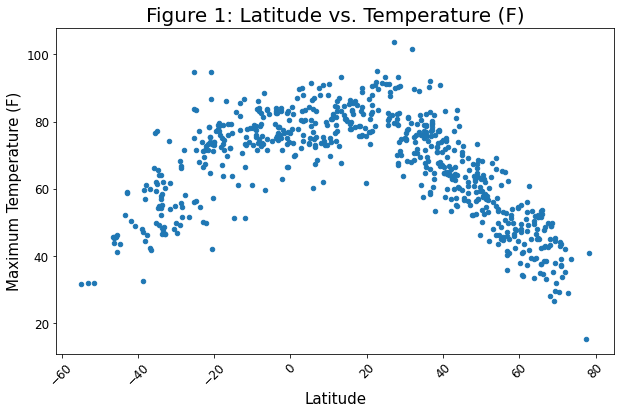

<Figure size 432x288 with 0 Axes>

In [62]:
# Step 1: Import the data again (if needed)
weather_data = pd.read_csv("output/world_cities.csv")

# Step 2: Create the plot
lat_temp_scatter_plot = weather_data.plot.scatter( x = "Lat", y = "Max Temp", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
lat_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
lat_temp_scatter_plot.set_title(("Figure 1: Latitude vs. Temperature (F)"), size = 20)
lat_temp_scatter_plot.set_ylabel(ylabel = "Maximum Temperature (F)", size = 15)
lat_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
lat_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Show the chart
plt.show()

# Step 5: Save the output as an image
plt.savefig("output/Part 1 - Figure 1.png")

## Latitude vs. Humidity Plot

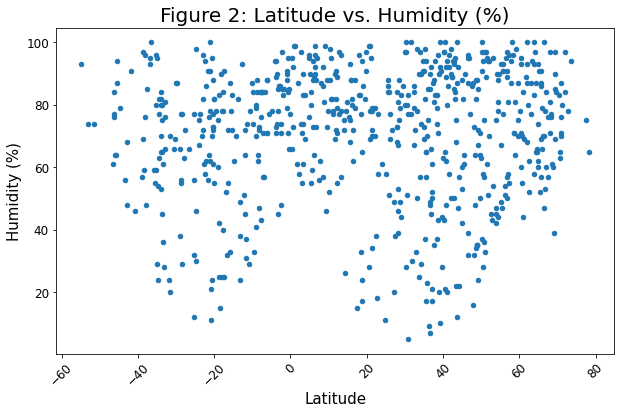

<Figure size 432x288 with 0 Axes>

In [63]:
# Step 1: Import the data again (if needed)
weather_data = pd.read_csv("output/world_cities.csv")

# Step 2: Create the plot
humid_temp_scatter_plot = weather_data.plot.scatter( x = "Lat", y = "Humidity", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
humid_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
humid_temp_scatter_plot.set_title(("Figure 2: Latitude vs. Humidity (%)"), size = 20)
humid_temp_scatter_plot.set_ylabel(ylabel = "Humidity (%)", size = 15)
humid_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
humid_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Show the chart
plt.show()

# Step 5: Save the output as an image
plt.savefig("output/Part 1 - Figure 2.png")

## Latitude vs. Cloudiness Plot

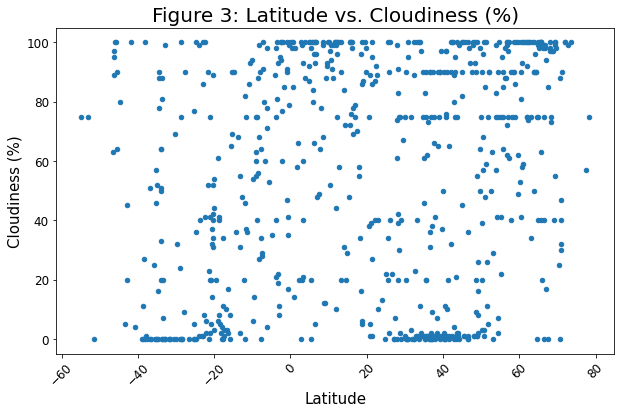

<Figure size 432x288 with 0 Axes>

In [64]:
# Step 1: Import the data again (if needed)
weather_data = pd.read_csv("output/world_cities.csv")

# Step 2: Create the plot
humid_temp_scatter_plot = weather_data.plot.scatter( x = "Lat", y = "Cloudiness", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
humid_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
humid_temp_scatter_plot.set_title(("Figure 3: Latitude vs. Cloudiness (%)"), size = 20)
humid_temp_scatter_plot.set_ylabel(ylabel = "Cloudiness (%)", size = 15)
humid_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
humid_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Show the chart
plt.show()

# Step 5: Save the output as an image
plt.savefig("output/Part 1 - Figure 3.png")

## Latitude vs. Wind Speed Plot

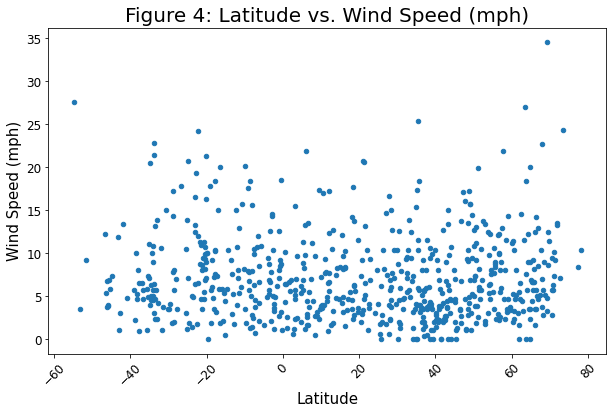

<Figure size 432x288 with 0 Axes>

In [65]:
# Step 1: Import the data again (if needed)
weather_data = pd.read_csv("output/world_cities.csv")

# Step 2: Create the plot
windspeed_temp_scatter_plot = weather_data.plot.scatter( x = "Lat", y = "Wind Speed", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
windspeed_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
windspeed_temp_scatter_plot.set_title(("Figure 4: Latitude vs. Wind Speed (mph)"), size = 20)
windspeed_temp_scatter_plot.set_ylabel(ylabel = "Wind Speed (mph)", size = 15)
windspeed_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
windspeed_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Show the chart
plt.show()

# Step 5: Save the output as an image
plt.savefig("output/Part 1 - Figure 4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

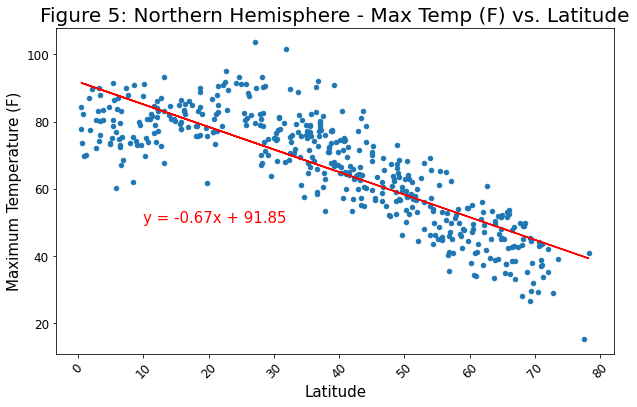

The correlation between both factors is -0.83


<Figure size 432x288 with 0 Axes>

In [66]:
# Step 1: Get all data from the northern hemipshere
northern_hemisphere = weather_data.loc[(weather_data["Lat"] > 0)]

# Step 2: Create the plot
northern_hemisphere_temp_scatter_plot = northern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Max Temp", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
northern_hemisphere_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
northern_hemisphere_temp_scatter_plot.set_title(("Figure 5: Northern Hemisphere - Max Temp (F) vs. Latitude"), size = 20)
northern_hemisphere_temp_scatter_plot.set_ylabel(ylabel = "Maximum Temperature (F)", size = 15)
northern_hemisphere_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
northern_hemisphere_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (10,50), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 5.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Max_Temp = y_values
correlation = st.pearsonr(Lat, Max_Temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

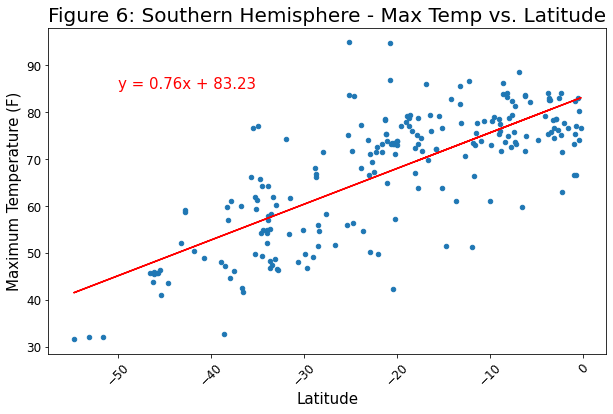

The correlation between both factors is 0.75


<Figure size 432x288 with 0 Axes>

In [73]:
# Step 1: Get all data from the northern hemipshere
southern_hemisphere = weather_data.loc[(weather_data["Lat"] < 0)]

# Step 2: Create the plot
southern_hemisphere_temp_scatter_plot = southern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Max Temp", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
southern_hemisphere_temp_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
southern_hemisphere_temp_scatter_plot.set_title(("Figure 6: Southern Hemisphere - Max Temp vs. Latitude"), size = 20)
southern_hemisphere_temp_scatter_plot.set_ylabel(ylabel = "Maximum Temperature (F)", size = 15)
southern_hemisphere_temp_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
southern_hemisphere_temp_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (-50, 85), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 6.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Max_Temp = y_values
correlation = st.pearsonr(Lat, Max_Temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

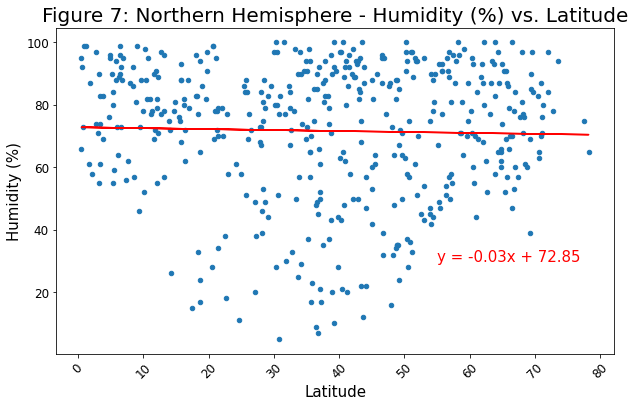

The correlation between both factors is -0.03


<Figure size 432x288 with 0 Axes>

In [67]:
# Step 1: Get all data from the northern hemipshere
northern_hemisphere = weather_data.loc[(weather_data["Lat"] > 0)]

# Step 2: Create the plot
northern_hemisphere_humid_scatter_plot = northern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Humidity", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
northern_hemisphere_humid_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
northern_hemisphere_humid_scatter_plot.set_title(("Figure 7: Northern Hemisphere - Humidity (%) vs. Latitude"), size = 20)
northern_hemisphere_humid_scatter_plot.set_ylabel(ylabel = "Humidity (%)", size = 15)
northern_hemisphere_humid_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
northern_hemisphere_humid_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (55,30), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 7.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Humidity = y_values
correlation = st.pearsonr(Lat, Humidity)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

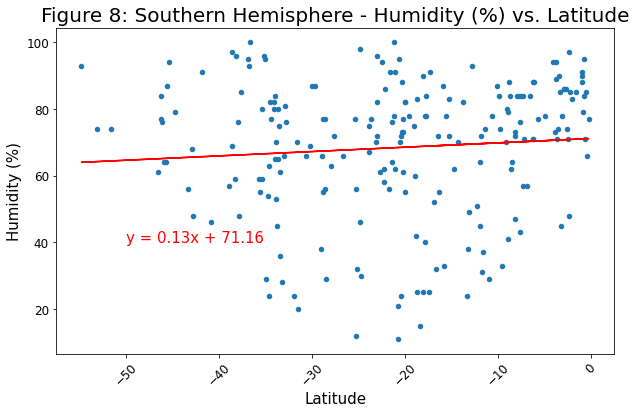

The correlation between both factors is 0.08


<Figure size 432x288 with 0 Axes>

In [68]:
# Step 1: Get all data from the northern hemipshere
southern_hemisphere = weather_data.loc[(weather_data["Lat"] < 0)]

# Step 2: Create the plot
southern_hemisphere_humid_scatter_plot = southern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Humidity", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
southern_hemisphere_humid_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
southern_hemisphere_humid_scatter_plot.set_title(("Figure 8: Southern Hemisphere - Humidity (%) vs. Latitude"), size = 20)
southern_hemisphere_humid_scatter_plot.set_ylabel(ylabel = "Humidity (%)", size = 15)
southern_hemisphere_humid_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
southern_hemisphere_humid_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (-50,40), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 8.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Humidity = y_values
correlation = st.pearsonr(Lat, Humidity)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

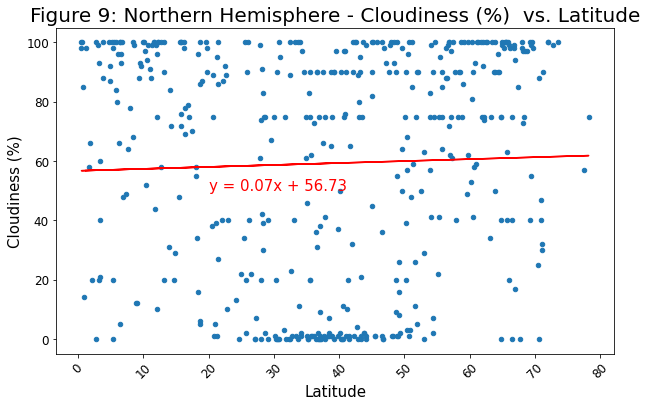

The correlation between both factors is 0.03


<Figure size 432x288 with 0 Axes>

In [69]:
# Step 1: Get all data from the northern hemipshere
northern_hemisphere = weather_data.loc[(weather_data["Lat"] > 0)]

# Step 2: Create the plot
northern_hemisphere_cloud_scatter_plot = northern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Cloudiness", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
northern_hemisphere_cloud_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
northern_hemisphere_cloud_scatter_plot.set_title(("Figure 9: Northern Hemisphere - Cloudiness (%)  vs. Latitude"), size = 20)
northern_hemisphere_cloud_scatter_plot.set_ylabel(ylabel = "Cloudiness (%)", size = 15)
northern_hemisphere_cloud_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
northern_hemisphere_cloud_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (20,50), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 9.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Cloudiness = y_values
correlation = st.pearsonr(Lat, Cloudiness)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

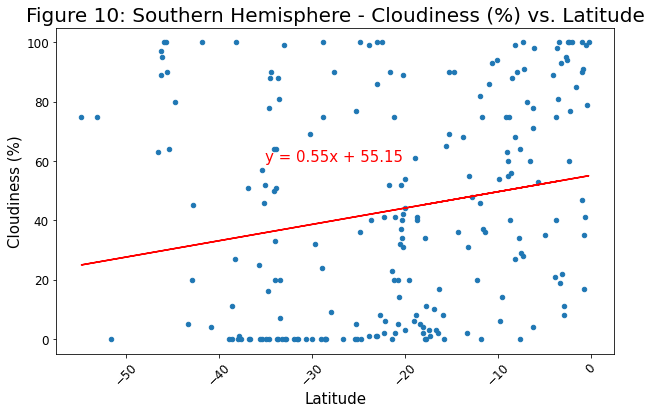

The correlation between both factors is 0.2


<Figure size 432x288 with 0 Axes>

In [70]:
# Step 1: Get all data from the northern hemipshere
southern_hemisphere = weather_data.loc[(weather_data["Lat"] < 0)]

# Step 2: Create the plot
southern_hemisphere_cloud_scatter_plot = southern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Cloudiness", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
southern_hemisphere_cloud_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
southern_hemisphere_cloud_scatter_plot.set_title(("Figure 10: Southern Hemisphere - Cloudiness (%) vs. Latitude"), size = 20)
southern_hemisphere_cloud_scatter_plot.set_ylabel(ylabel = "Cloudiness (%)", size = 15)
southern_hemisphere_cloud_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
southern_hemisphere_cloud_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (-35,60), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 10.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
Cloudiness = y_values
correlation = st.pearsonr(Lat, Cloudiness)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

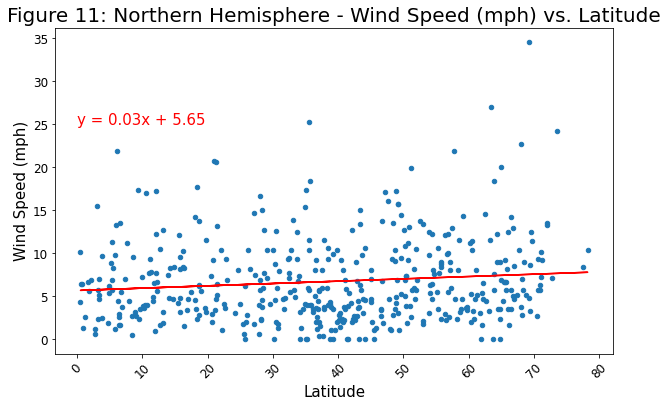

The correlation between both factors is 0.11


<Figure size 432x288 with 0 Axes>

In [71]:
# Step 1: Get all data from the northern hemipshere
northern_hemisphere = weather_data.loc[(weather_data["Lat"] > 0)]

# Step 2: Create the plot
northern_hemisphere_wind_scatter_plot = northern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Wind Speed", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
northern_hemisphere_wind_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
northern_hemisphere_wind_scatter_plot.set_title(("Figure 11: Northern Hemisphere - Wind Speed (mph) vs. Latitude"), size = 20)
northern_hemisphere_wind_scatter_plot.set_ylabel(ylabel = "Wind Speed (mph)", size = 15)
northern_hemisphere_wind_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
northern_hemisphere_wind_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (0,25), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 11.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
WindSpeed = y_values
correlation = st.pearsonr(Lat, WindSpeed)
print(f"The correlation between both factors is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

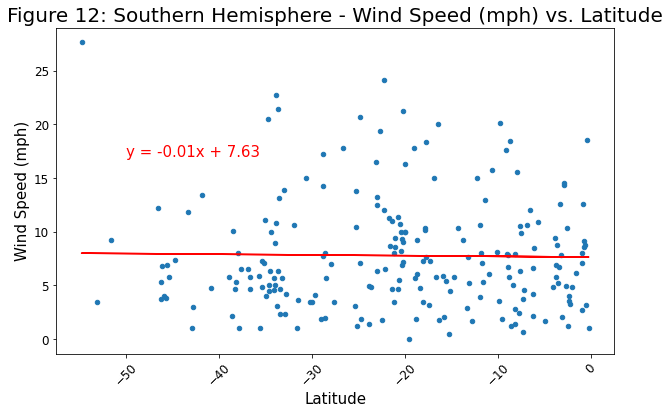

The correlation between both factors is -0.02


<Figure size 432x288 with 0 Axes>

In [72]:
# Step 1: Get all data from the northern hemipshere
southern_hemisphere = weather_data.loc[(weather_data["Lat"] < 0)]

# Step 2: Create the plot
southern_hemisphere_wind_scatter_plot = southern_hemisphere.plot.scatter( x = "Lat", 
                                                                         y = "Wind Speed", figsize = (10, 6), s = 20)

# Step 3: Reformat all the labels, titles, and ticks
southern_hemisphere_wind_scatter_plot.set_xlabel(xlabel = "Latitude", size = 15)
southern_hemisphere_wind_scatter_plot.set_title(("Figure 12: Southern Hemisphere - Wind Speed (mph) vs. Latitude"), size = 20)
southern_hemisphere_wind_scatter_plot.set_ylabel(ylabel = "Wind Speed (mph)", size = 15)
southern_hemisphere_wind_scatter_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
southern_hemisphere_wind_scatter_plot.yaxis.set_tick_params(labelsize = 12)

# Step 4: Create the linear regression model
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (-50,17), fontsize = 15 , color = "red")

# Step 5: Show the chart
plt.show()

# Step 6: Save the output as an image
plt.savefig("output/Part 1 - Figure 12.png")

# Part 2: Get the Correlation Coefficient
Lat = x_values
WindSpeed = y_values
correlation = st.pearsonr(Lat, WindSpeed)
print(f"The correlation between both factors is {round(correlation[0],2)}")